<a href="https://colab.research.google.com/github/chandrakanta-chaudhury/Misc/blob/master/Noise_removal_sample_from_audio_signals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget http://groups.inf.ed.ac.uk/ami/download/temp/amiBuild-42250-Fri-Mar-6-2020.wget.sh

--2020-03-11 10:07:42--  http://groups.inf.ed.ac.uk/ami/download/temp/amiBuild-42250-Fri-Mar-6-2020.wget.sh
Resolving groups.inf.ed.ac.uk (groups.inf.ed.ac.uk)... 129.215.202.26
Connecting to groups.inf.ed.ac.uk (groups.inf.ed.ac.uk)|129.215.202.26|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2232 (2.2K) [application/x-sh]
Saving to: ‘amiBuild-42250-Fri-Mar-6-2020.wget.sh’

amiBuild-42250-Fri- 100%[===================>]   2.18K  --.-KB/s    in 0s      

2020-03-11 10:07:42 (359 MB/s) - ‘amiBuild-42250-Fri-Mar-6-2020.wget.sh’ saved [2232/2232]



In [2]:
!sh amiBuild-42250-Fri-Mar-6-2020.wget.sh

--2020-03-11 10:08:01--  http://groups.inf.ed.ac.uk/ami/AMICorpusMirror//amicorpus/ES2008a/audio/ES2008a.Array1-01.wav
Resolving groups.inf.ed.ac.uk (groups.inf.ed.ac.uk)... 129.215.202.26
Connecting to groups.inf.ed.ac.uk (groups.inf.ed.ac.uk)|129.215.202.26|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33387564 (32M) [audio/x-wav]
Saving to: ‘amicorpus/ES2008a/audio/ES2008a.Array1-01.wav’

ES2008a.Array1-01.w 100%[===================>]  31.84M  16.7MB/s    in 1.9s    

2020-03-11 10:08:03 (16.7 MB/s) - ‘amicorpus/ES2008a/audio/ES2008a.Array1-01.wav’ saved [33387564/33387564]

--2020-03-11 10:08:03--  http://groups.inf.ed.ac.uk/ami/AMICorpusMirror//amicorpus/ES2008a/audio/ES2008a.Array1-02.wav
Resolving groups.inf.ed.ac.uk (groups.inf.ed.ac.uk)... 129.215.202.26
Connecting to groups.inf.ed.ac.uk (groups.inf.ed.ac.uk)|129.215.202.26|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33387564 (32M) [audio/x-wav]
Saving to: ‘amicorpus/ES20

In [3]:
!ls

amiBuild-42250-Fri-Mar-6-2020.manifest.txt  amicorpus	 sample_data
amiBuild-42250-Fri-Mar-6-2020.wget.sh	    CCBY4.0.txt


In [0]:
#/content/amicorpus/ES2008a/audio

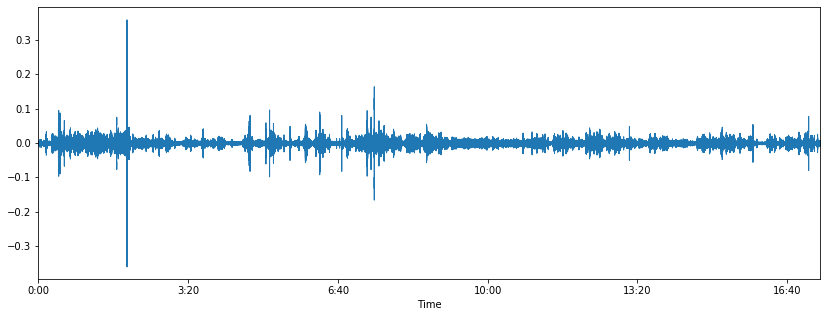

In [5]:
import librosa
x , sr = librosa.load('/content/amicorpus/ES2008a/audio/ES2008a.Array1-07.wav')
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x,sr=sr)

In [6]:
x.shape

(23006088,)

In [0]:
mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc = 40)

In [10]:
mfccs.shape

(40, 44934)

In [0]:
#RBFN

In [0]:
#RBFN function is from Thomas Rückstieß's implementations 
from scipy import *
from scipy.linalg import norm, pinv
import numpy as np 
from matplotlib import pyplot as plt
 
class RBF:
     
    def __init__(self, indim, numCenters, outdim):
        self.indim = indim
        #print(indim)
        self.outdim = outdim
        self.numCenters = numCenters
        self.centers = [random.uniform(-1, 1, indim) for i in range(numCenters)]
        self.beta = 8
        self.W = random.random((self.numCenters, self.outdim))
         
    def _basisfunc(self, c, d):
        #print(d)
        #print("basis function called from act")
        assert len(d) == self.indim
        return exp(-self.beta * norm(c-d)**2)
     
    def _calcAct(self, X):
        # calculate activations of RBFs
        print("cal act started")
        G = np.zeros((X.shape[0], self.numCenters),dtype='float16')
        #G=np.asarray(G)
        for ci, c in enumerate(self.centers):
            for xi, x in enumerate(X):
                G[xi,ci] = self._basisfunc(c, x)
        return G
     
    def train(self, X, Y):
        """ X: matrix of dimensions n x indim 
            y: column vector of dimension n x 1 """
         
        # choose random center vectors from training set
        rnd_idx = random.permutation(X.shape[0])[:self.numCenters]
        print(rnd_idx)
        self.centers = [X[i,:] for i in rnd_idx]
         
        print ("centers",self.centers)
        # calculate activations of RBFs
        G = self._calcAct(X)
        print("processing done for Act cal")
        #print (G)
         
        # calculate output weights (pseudoinverse)
        self.W = dot(pinv(G), Y)
         
    def test(self, X):
        """ X: matrix of dimensions n x indim """
         
        G = self._calcAct(X)
        Y = dot(G, self.W)
        return Y

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: scipy.sin is deprecated and will be removed in SciPy 2.0.0, use numpy.sin instead
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: DeprecationWarning: scipy.dot is deprecated and will be removed in SciPy 2.0.0, use numpy.dot instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: DeprecationWarning: scipy.dot is deprecated and will be removed in SciPy 2.0.0, use numpy.dot instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, u

<class 'numpy.ndarray'>
40
[ 2 11 25 13 39 28 31  3  0 30]
centers [array([-0.8974359]), array([-0.43589744]), array([0.28205128]), array([-0.33333333]), array([1.]), array([0.43589744]), array([0.58974359]), array([-0.84615385]), array([-1.]), array([0.53846154])]
cal act started
processing done for Act cal
cal act started


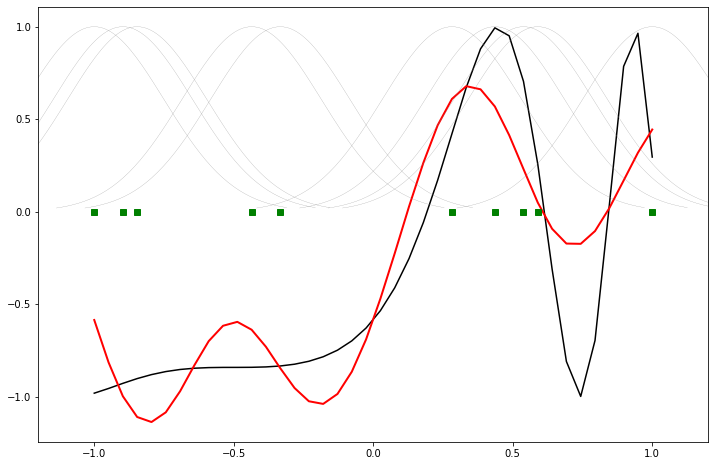

In [13]:
if __name__ == '__main__':
    # ----- 1D Example ------------------------------------------------
    #n = 100
     
    x = mgrid[-1:1:complex(0,mfccs.shape[0])].reshape(mfccs.shape[0], 1)
    # set y and add random noise
    y = sin(3*(x+0.5)**3 - 1)
    print(type(y))
    print(len(y))
    #y += random.normal(0, 0.1, y.shape)
     
    # rbf regression
    rbf = RBF(1,10, 1)
   #print(type(x),type(y))
    rbf.train(x, y)
    z = rbf.test(x)
       
    # plot original data
    plt.figure(figsize=(12, 8))
    plt.plot(x, y, 'k-')
     
    # plot learned model
    plt.plot(x, z, 'r-', linewidth=2)
     
    # plot rbfs
    plt.plot(rbf.centers, zeros(rbf.numCenters), 'gs')
     
    for c in rbf.centers:
        # RF prediction lines
        cx = arange(c-0.7, c+0.7, 0.01)
        cy = [rbf._basisfunc(array([cx_]), array([c])) for cx_ in cx]
        plt.plot(cx, cy, '-', color='gray', linewidth=0.2)
     
    plt.xlim(-1.2, 1.2)
    plt.show()

In [0]:
#above plot --> Red line for the new predicted signals after removing noise by RBF , black line in the plot is for original signal 

In [0]:
#create signal file from the predicted signals (z) --> use librosa to create it

In [0]:
librosa.output.write_wav('Noise_R_ES2008a.Array1-07.wav',z, sr)

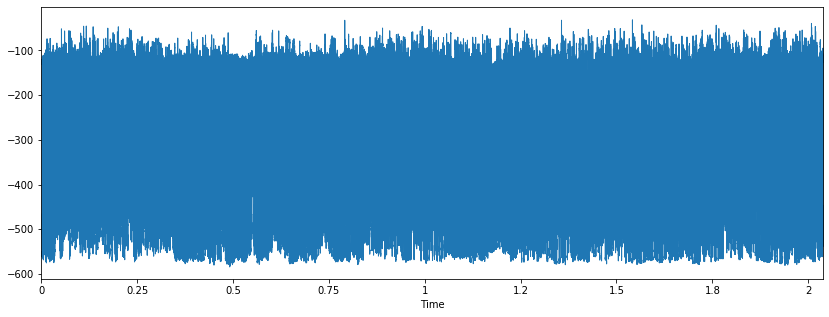

In [18]:
#display the original file , we are using mfccs as this the feature we have extracted from the orginal signal file 
#due to system memory constraint we deal with features extracted from the .wav file , instead of whole signal file
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(mfccs,sr=sr_new)

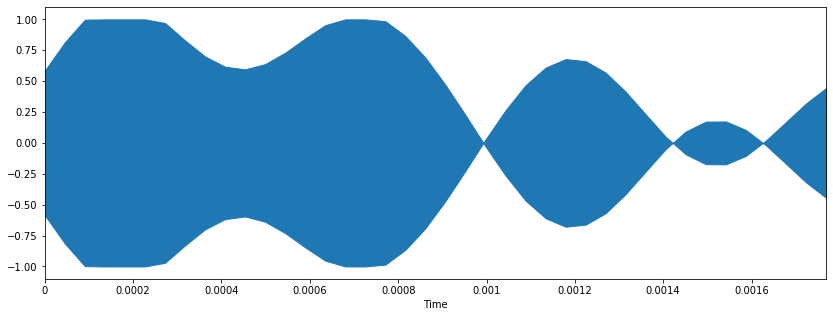

In [16]:
#plot the new signal file after we removed the noise
import librosa
x_new, sr_new = librosa.load('/content/Noise_R_ES2008a.Array1-07.wav')
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x_new,sr=sr_new)

